In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [166]:
df = pd.read_csv('weather_data.csv')

In [167]:
df.head()

,time,temperature_2m,precipitation,relativehumidity_2m,windspeed_10m,winddirection_10m,surface_pressure,cloudcover,dewpoint_2m,visibility,evapotranspiration,city
0,2026-01-25 00:00:00,7.5,0.1,83,14.3,137,991.2,100,4.8,22020.0,0.0,Edinburgh
1,2026-01-25 01:00:00,7.5,0.1,85,12.3,140,991.2,100,5.2,18500.0,0.0,Edinburgh
2,2026-01-25 02:00:00,7.7,0.0,84,11.7,137,991.2,96,5.2,19920.0,0.0,Edinburgh
3,2026-01-25 03:00:00,7.6,0.2,86,9.5,143,990.4,100,5.4,15940.0,0.0,Edinburgh
4,2026-01-25 04:00:00,7.5,0.2,87,10.7,130,990.8,100,5.5,13420.0,0.0,Edinburgh


In [168]:
df = df.rename(columns={'temperature_2m':'temperature','relativehumidity_2m': 'relative_humidity','windspeed_10m':'wind_speed','winddirection_10m':'wind_direction'})

In [169]:
df.shape

(174720, 12)

In [170]:
df.isna().sum()

time                  0
temperature           0
precipitation         0
relative_humidity     0
wind_speed            0
wind_direction        0
surface_pressure      0
cloudcover            0
dewpoint_2m           0
visibility            0
evapotranspiration    0
city                  0
dtype: int64

In [171]:
df.duplicated().sum()

np.int64(0)

In [172]:
df.describe()

,temperature,precipitation,relative_humidity,wind_speed,wind_direction,surface_pressure,cloudcover,dewpoint_2m,visibility,evapotranspiration
count,174720.000000,174720.000000,174720.000000,174720.000000,174720.000000,174720.000000,174720.000000,174720.000000,174720.000000,174720.0
mean,6.230357,0.095119,86.464286,8.786905,146.011905,989.670238,83.970238,4.096429,19922.827381,0.0
std,1.586959,0.234793,6.524599,4.437442,59.389522,5.149536,27.309684,1.182308,9833.078529,0.0
min,2.400000,0.000000,65.000000,0.700000,45.000000,980.200000,0.000000,1.500000,3480.000000,0.0
25%,5.000000,0.000000,83.000000,5.075000,106.500000,985.000000,82.750000,3.100000,12815.000000,0.0
50%,6.500000,0.000000,87.000000,8.250000,128.500000,990.350000,99.000000,4.200000,19510.000000,0.0
75%,7.325000,0.100000,93.000000,11.800000,195.000000,992.400000,100.000000,5.000000,24140.000000,0.0
max,9.800000,1.400000,96.000000,23.900000,283.000000,1000.400000,100.000000,7.100000,56660.000000,0.0


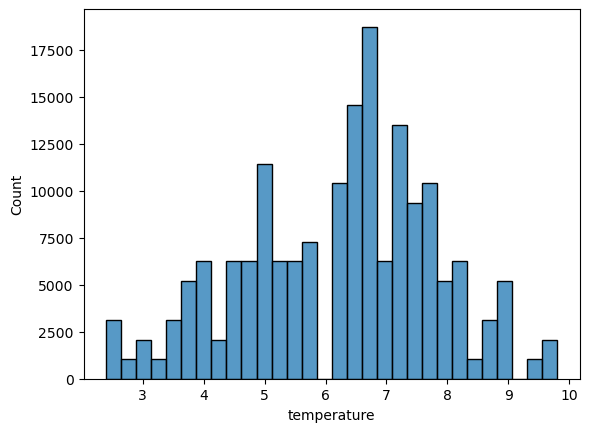

In [173]:
sns.histplot(df['temperature'], bins = 30)
plt.show()

In [174]:
df.head()

,time,temperature,precipitation,relative_humidity,wind_speed,wind_direction,surface_pressure,cloudcover,dewpoint_2m,visibility,evapotranspiration,city
0,2026-01-25 00:00:00,7.5,0.1,83,14.3,137,991.2,100,4.8,22020.0,0.0,Edinburgh
1,2026-01-25 01:00:00,7.5,0.1,85,12.3,140,991.2,100,5.2,18500.0,0.0,Edinburgh
2,2026-01-25 02:00:00,7.7,0.0,84,11.7,137,991.2,96,5.2,19920.0,0.0,Edinburgh
3,2026-01-25 03:00:00,7.6,0.2,86,9.5,143,990.4,100,5.4,15940.0,0.0,Edinburgh
4,2026-01-25 04:00:00,7.5,0.2,87,10.7,130,990.8,100,5.5,13420.0,0.0,Edinburgh


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174720 entries, 0 to 174719
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   time                174720 non-null  object 
 1   temperature         174720 non-null  float64
 2   precipitation       174720 non-null  float64
 3   relative_humidity   174720 non-null  int64  
 4   wind_speed          174720 non-null  float64
 5   wind_direction      174720 non-null  int64  
 6   surface_pressure    174720 non-null  float64
 7   cloudcover          174720 non-null  int64  
 8   dewpoint_2m         174720 non-null  float64
 9   visibility          174720 non-null  float64
 10  evapotranspiration  174720 non-null  float64
 11  city                174720 non-null  object 
dtypes: float64(7), int64(3), object(2)
memory usage: 16.0+ MB


In [176]:
df['time']=pd.to_datetime(df['time'])

In [177]:
df['hour'] = df['time'].dt.hour
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month

In [178]:
df['relative_humidity_lag'] = df['relative_humidity'].shift(-72)
df['surface_pressure_lag'] = df['surface_pressure'].shift(-72)
df['wind_direction_lag'] = df['wind_direction'].shift(-72)
df['wind_speed_lag'] = df['wind_speed'].shift(-72)
df['dewpoint_2m_lag'] = df['dewpoint_2m'].shift(-72)
df['evapotranspiration_lag'] = df['evapotranspiration'].shift(-72)
df['visibility_lag'] = df['visibility'].shift(-72)
df['cloudcover_lag'] = df['cloudcover'].shift(-72)
df['precipitation_lag'] = df['precipitation'].shift(-72)



df = df.dropna()

In [179]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer


In [180]:
y = df['temperature']

x = df.drop(columns=['temperature','time', 'hour','day','month','precipitation','relative_humidity','surface_pressure','wind_direction','dewpoint_2m','wind_speed','evapotranspiration','visibility','cloudcover'])


In [181]:
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

In [182]:
x.columns

Index(['city', 'relative_humidity_lag', 'surface_pressure_lag',
       'wind_direction_lag', 'wind_speed_lag', 'dewpoint_2m_lag',
       'evapotranspiration_lag', 'visibility_lag', 'cloudcover_lag',
       'precipitation_lag'],
      dtype='object')

In [183]:
train_len = int(0.8 * len(df))
val_len = int(0.9 * len(df))

print(train_len)
print(val_len)
print(len(df))
x_train = x[:train_len]
y_train = y[:train_len]

x_val = x[train_len : val_len]
y_val = y[train_len : val_len]

x_test = x[val_len: ]
y_test = y[val_len: ]

139718
157183
174648


In [184]:
num_cols = x.select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols = x.select_dtypes(include=['object']).columns.tolist()

In [185]:
preprocessor = ColumnTransformer([('num',StandardScaler(),num_cols),('cat',OneHotEncoder(),cat_cols)])
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)
x_val_transformed = preprocessor.transform(x_val)


In [186]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import recall_score, precision_score,accuracy_score, mean_squared_error, r2_score

In [187]:
x_train_transformed = x_train_transformed.toarray() if hasattr(x_train_transformed, "toarray") else x_train_transformed
x_test_transformed = x_test_transformed.toarray() if hasattr(x_test_transformed, "toarray") else x_test_transformed
x_val_transformed = x_val_transformed.toarray() if hasattr(x_test_transformed, "toarray") else x_val_transformed


In [188]:
if x_train_transformed.ndim == 1:
    x_train_transformed = x_train_transformed.reshape(-1, 1)
    x_test_transformed = x_test_transformed.reshape(-1, 1)

In [189]:
reg_model = LinearRegression()
reg_model.fit(x_train_transformed,y_train)
y_pred = reg_model.predict(x_val_transformed)
r2 = r2_score(y_val,y_pred)
mse = mean_squared_error(y_val,y_pred)
print(r2, mse)


0.32966646781071507 1.6873967497736886


In [190]:
rid_model = Ridge(alpha=10,tol=0.001,solver='auto')
rid_model.fit(x_train_transformed,y_train)
y_pred = rid_model.predict(x_val_transformed)
r2 = r2_score(y_val,y_pred)
mse = mean_squared_error(y_val,y_pred)
print(r2, mse)

0.3296662816064353 1.687397218496319


not linear

In [191]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train_transformed,y_train)
y_pred = rf_model.predict(x_val_transformed)
r2 = r2_score(y_val,y_pred)
mse = mean_squared_error(y_val,y_pred)
print(r2, mse)

1.0 1.1884466869302156e-27


In [192]:
lg_model = LGBMRegressor()
lg_model.fit(x_train_transformed,y_train)
y_pred = lg_model.predict(x_val_transformed)
r2 = r2_score(y_val,y_pred)
mse = mean_squared_error(y_val,y_pred)
print(r2, mse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 608
[LightGBM] [Info] Number of data points in the train set: 139718, number of used features: 8
[LightGBM] [Info] Start training from score 6.230237
0.9999945039121949 1.3835024287750075e-05


c:\Users\cathy\anaconda3\envs\'musicenv'\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [193]:
xg_model = XGBRegressor()
xg_model.fit(x_train_transformed,y_train)
y_pred = xg_model.predict(x_val_transformed)
r2 = r2_score(y_val,y_pred)
mse = mean_squared_error(y_val,y_pred)
print(r2, mse)

0.9999999941454085 1.4737467596051968e-08


In [ ]:
results_df = pd.DataFrame({
    'Actual': y_val,
    'Predicted': y_pred
})
results_df = results_df.reset_index(drop=True)

print(results_df.head(10))

results_df['diff'] = results_df['Actual'] - results_df['Predicted']


   Actual  Predicted
0     8.0   7.999835
1     7.9   7.899930
2     7.6   7.600075
3     7.1   7.099932
4     6.7   6.700097
5     6.5   6.500168
6     6.5   6.500063
7     6.5   6.499971
8     6.6   6.600036
9     6.8   6.799780


In [195]:
results_df['diff'].max()

0.0003948211669921875

                  Feature  Importance
0                    city    0.277253
3      wind_direction_lag    0.180265
7          visibility_lag    0.160385
1   relative_humidity_lag    0.152220
4          wind_speed_lag    0.134284
2    surface_pressure_lag    0.066341
6  evapotranspiration_lag    0.026228
8          cloudcover_lag    0.003023
5         dewpoint_2m_lag    0.000000
9       precipitation_lag    0.000000


C:\Users\cathy\AppData\Local\Temp\ipykernel_78048\503673768.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


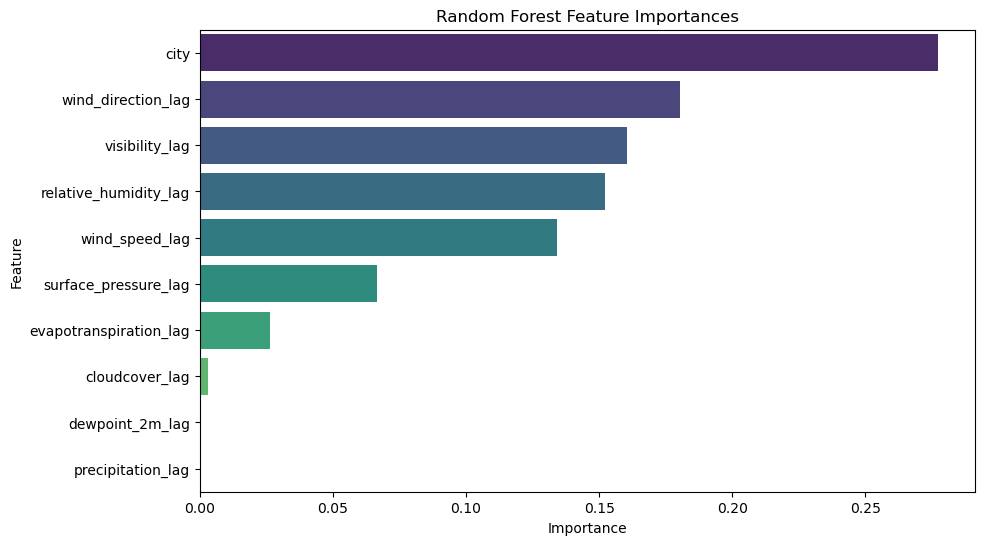

In [ ]:
feature_names = x_train.columns 

importances = rf_model.feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest Feature Importances')
plt.show()
